# Intro

-   The internet is full of data
-   Much of our lives and livelihoods lives on the internet
-   The programming and theoretical skills we've developed can allow us
    to do meaningful analysis of internet data

… If we can get it into Python!

## Accessing Website Data

-   Some data we see on websites data is easier to access:
    -   Provided as a downloadable file we can `pd.read_csv`
    -   Accessible via an API
    -   Contained in a clean html table for `pd.read_html`
-   … but some of it isn't
-   Today we'll learn how to access some of the data that is publicly
    visible, but not easy to download

## HTML: Language of the web

-   Web pages are written in a markup language called HTML

-   HTML stands for "hyper text markup language"

-   All HTML documents are composed of a tree of nested elements

-   For example, this bullet point list would be written like this in
    HTML:

    ``` html
    <ul>
      <li>Web pages are..</li>
      <li>HTML stands for...</li>
      <li>All HTML documents...</li>
      <li>For example, this...</li>
    </ul>
    ```

### Components of HTML

-   Below is an image that annotates the core parts of an HTML document

![](./html_parts.png)

-   Tag: name or type of an element
-   CSS classes: used to style and change appearance (we'll use it to
    identify specific elements!)
-   id: Unique identifier for element **on whole webpage**
-   value: `class` is one property, syntax is `property\=value`
-   text: the actual text contained in the element

### Structure of Webpage

-   Most webpages follow a very common structure:

    ``` html
    <!DOCTYPE HTML>
    <html>
    <head>
      <meta>...</meta>
      <title>...</title>
      <link>...</link>
    </head>
    <body>
      <h1>Title</h1>
      .... MANY MORE ELEMENTS HERE ...
    </body>
    </html>
    ```

-   Almost all the data we will want to scrape is contained inside the
    `<body>` element

### See it in Action!

-   Let's see this in action
-   We'll navigate to
    [<http://quotes.toscrape.com/random>](http://quotes.toscrape.com/random)
    and use our web browser to look at the HTML
-   Things to look for:
    -   The outline from previous slide
    -   The use of `class`
    -   The hierarchy of the page

### Multiple Quotes?

-   Now that we are warmed up, let's look at a page with multiple quotes
-   Navigate to
    [<http://quotes.toscrape.com/>](http://quotes.toscrape.com/) and
    look at the source
-   We'll watch for the same main concepts/components

### How to "Scrape"?

-   Now the main question: "How could we scrape this data?"
-   The key to web scraping is to be able to **identify** patterns
-   My main strategy for doing this is to follow these steps:
    1.  View the webpage and identify visually the data I'd like to
        scrape
    2.  Open browser tools and "inspect" the element containing my data
    3.  Look at that element's tag, classes, id to see how I could tell
        a computer to identify it
    4.  Look outwards to other elements to scrape
        -   Same type of data, e.g. a price (find pattern in structure
            that matches original element)
        -   Different type of data, e.g. an average review: start
            process again

# Scrapy

-   There are many Python libraries for scraping websites
-   Perhaps the most widely used of these is called `scrapy`
-   We will use `scrapy` to extract the quote information we saw on the
    example websites
-   First step would be to install scrapy if you haven't yet:
    `pip install scrapy`

## Running Scrapy

-   Scrapy can be run in the `scrapy shell` as we just saw
-   However, one benefit from learning how to scrape websites is to be
    able to have scrapers run as programs that don't need manual
    interactions
-   Scrapy was built for this use case

## Scrapy Project

-   Scrapy provides a scaffold we can use to organize our web scrapers
-   This is called a scrapy project
-   We can create one by running `scrapy startproject NAME` where `NAME`
    is the name of our project
-   Let's try it!

## Spiders

-   We need to teach scrapy how to extract data from the web pages we
    have it visit
-   To do this we create a Spider
-   A spider is a class we define that has at least the following
    features:
    -   A list of websites to scrape
    -   A Python function for how to exract data from a single webpage
-   We'll create our first spider now

## Working with Spiders

-   We can run a spider using `scrapy crawl NAME -o OUTFILE.EXT`, where
    -   `NAME` is the name of the spider
    -   `OUTFILE.EXT` are the name and extension for storing the data
-   We can also have the spider continue on to another page
    -   To do this we need to find the next url to visit and tell scrapy
        to scrape it
    -   To scrape the next url we use the `response.follow(URL)` method
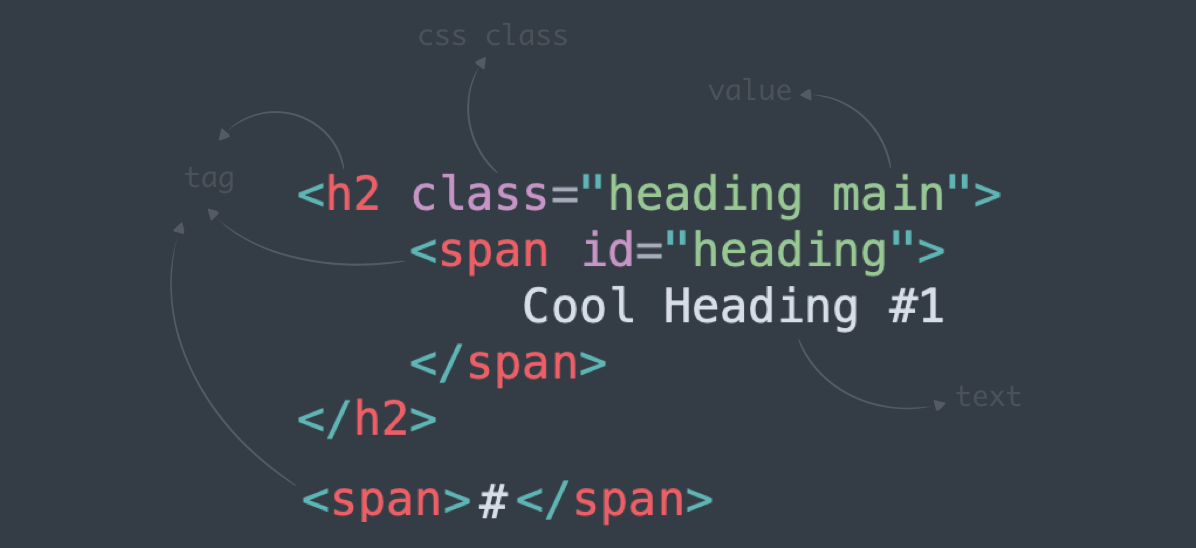